In [ ]:
# Logisitic Regression
# September 29, 2020
# Marc, Rebecca, and Sophie

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import numpy.matlib
import io
import requests
import warnings



# Logistic Regression Intro
Four different logistic regression models, including unregularized, L1 regularized, L2 regularized and stepwise were run on two datasets. The models were trained, validated and tested using percent correct as a metric of good performance. The L1 and L2 penalize less important features. The stepwise model chooses only the features that improve the overall percent correct.

# Functions

In [ ]:
### FUNCTIONS ###

# Sigmoid Function
def sigmoid(theta,x):
  #h = 1/(1 + np.exp(-1*np.dot(np.transpose(theta),x)))
  h = 1/(1 + np.exp(-1*np.matmul(np.transpose(theta),x))) # transpose x made step wise work
  return h

# Log-Likelihood Function
def likelihood(theta,training_features,y):
  log_likelihood = 0
  log_likelihood_vec = np.zeros(len(training_features))
  for i in range(0,len(training_features)):
    h = sigmoid(theta,training_features[i])
    addition = y[i]*np.log(h) + (1 - y[i])*np.log(1-h)
    log_likelihood = log_likelihood + addition
    log_likelihood_vec[i] = log_likelihood
  return log_likelihood_vec

# Stochastic Gradient Descent w/ No Regularization, L2, and L1 Regularization
# This function takes in step size, features, labels, and which regularization to apply (unreg, L2, L1).
def logistic(alpha, training_features, training_labels, lamb, L1_reg, L2_reg):
  # Inputs: alpha = stepsize, lambda = tuning factor, L1_reg = 1 for L1_reg 0 for not, L2_reg = 1 for L2_reg 0 for not)

  # Convert df to np
  x_logl = np.array(training_features)

  # Initialize array
  theta_vec = np.ones(len(training_features.iloc[1]))

  iterations = 20
  training_features = np.array(training_features)
  #training_features = np.repeat(x,iterations,0)
  y = np.array(training_labels)
  #y = np.repeat(y,iterations,0)

  # Loop across Features (along a row, across all the columns)
  for j in range(0,np.size(training_features,1)):

    theta_old = 0 # Initial theta

    # Loop down Features (down a row on a single column)
    for i in range(0,len(training_features)):

      # Make a row of features 
      x = training_features[i,:]

      # Compute the sigmoid
      h = sigmoid(theta_vec,x)
      
      # Compute norms for regularization
      if L1 == 0:
        L1_norm = 0
      else:
        L1_norm = np.sum(np.absolute(theta_vec))
      L2_norm = np.sum(np.absolute(theta_vec))    

      # Stochastic Gradient Ascent Rule with Regularization Options
      theta_old = theta_old + alpha*(y[i] - h)*(x[j]) - L1_reg*(lamb/len(y))*np.sign(theta_old) - 2*L2_reg*(lamb/len(y))*(theta_old) # pg 19 of Ng notes

    theta_vec[j] = theta_old

  #ll = likelihood(theta_vec,x_logl,y) # Computes log likelihood for this theta vector
  return theta_vec, L1_norm


# Percent Correct Function
# This function takes in the features, labels, and theta vector generated by the logistic function.
# Uses sigmoid evaluated at theta and features to predict labels. Compares predicted labels to actual labels.
def percent_correct(features,labels,theta_vec):
  x = np.array(features)

  y_vec = np.array(labels)
  y_hat = np.zeros(len(y_vec))
  correct = 0

  # Loops down the rows of features
  for i in range(0,len(x)):
    h = sigmoid(theta_vec,x[i])
    y = y_vec[i]

   # Probability of Class 0
    P_0givenx = h**0 * (1-h)**(1-0) # page 18 of Ng notes
   # Probability of Class 1
    P_1givenx = h**1 * (1-h)**(1-1) 
    P_1givenx = h
    # Predict y_hat
    if P_1givenx > 0.5:
      y_hat[i] = 1
    else:
      y_hat[i] = 0

    # Compare y_hat to real label
    if y_hat[i] == y:
      correct += 1

  # Compute percent correct
  p = correct/len(y_vec) * 100

  return p

# Compute Baseline % Correct
def baseline(training_labels,testing_labels):
  d = np.sum(training_labels)/len(training_labels) # Find fraction of 1s in training labels
  correct = 0 # Initial "correct" value 

  if d > 0.5:
    baseline_prediction = np.ones(len(testing_labels)) # Assign all 1s to predicted labels if training more than 50% 1s 
  if d <= 0.5:
    baseline_prediction = np.zeros(len(testing_labels)) # Assign all 0s to predicted labels if training labels more than 50% 0s

  t = np.array(testing_labels) # Convert a numpy array
  for i in range(0,len(testing_labels)):
    y = t[i]  
    if baseline_prediction[i] == y: # Compares the baseline from training to the testing labels
      correct += 1 # Add 1 if match

  baseline_p = correct/len(baseline_prediction) * 100 # Compute % Correct
  return baseline_p

  # Validation for L1 regularization
# Want to maximize percent correct

def validation(alpha, training_features, training_labels,validation_features,validation_labels, L1, L2):
  lamda_vec = np.linspace(0.01,0.99,100)  #step-size
  p_vec = np.zeros(len(lamda_vec))
  p = 0
  y = np.array(validation_labels)

  if L1 == 5:

    plt.figure(1)
    plt.figure(figsize=(10,10))

    theta_val = [0] * (10)
    L1_vec = [0] * 1
    for a in range(0,len(lamda_vec)):
      lamb = lamda_vec[a]
      theta_vec_L1, L1_norm = logistic(alpha, training_features, training_labels,lamb,L1,L2)
      theta_val = np.vstack([theta_val,theta_vec_L1])
      L1_vec = np.append(L1_vec, L1_norm)
      p = percent_correct(validation_features,validation_labels,theta_vec_L1)
      p_vec[a] = p


    theta_val = np.delete(theta_val, 0, axis=0)
    theta_val = np.transpose(theta_val)
    L1_vec = np.delete(L1_vec, 0, axis=0)
    L1_vec = np.transpose(L1_vec)

    for b in range(0, len(L1_vec)):
      plt.plot(L1_vec,theta_val[b])

    legend_names = feature_names[1:len(feature_names)]
    plt.title('Figure 4.13: L1 regularized logistic regression coefficients versus L1 Norm')
    plt.xlabel('||theta($\lambda$)||')
    plt.ylabel('theta')
    plt.legend(legend_names)
    plt.axvline(x = optimal_lambda, color = 'r', linestyle = '--')
    plt.show()

  optimal_lamda = lamda_vec[np.where(p_vec == max(p_vec))]

  return optimal_lamda[0]

  # Stepwise
# The stepwise function takes the first feature, computes % correct, adds another feature, 
# computes % correct, compares the first % correct to the second % correct. If the first % correct 
# is greater than the second percent correct, we will drop the second added feature. We will repeat this trial-and-error
# analysis until we get a set of features that give us the highest percent correct. This stepwise process is run on the
# unregularized logistic function.

def stepwise(training_features,validation_features,testing_features,training_labels,validation_labels,testing_labels):
  alpha = 0.1
  prev_p = 0

  all_features = training_features.iloc[:,0:1]
  all_val_features = validation_features.iloc[:,0:1]
  all_test_features = testing_features.iloc[:,0:1]

  # Training and step-wise validation

  for i in range(0,len(training_features.iloc[0])):
    curr_feature = training_features.iloc[:,i:(i+1)]
    curr_val_feature = validation_features.iloc[:,i:i+1]
    curr_test_feature = testing_features.iloc[:,i:i+1]
    all_features[feature_names[i]] = curr_feature
    all_val_features[feature_names[i]] = curr_val_feature
    all_test_features[feature_names[i]] = curr_test_feature
    theta_vec_step,L1_norm = logistic(alpha, all_features, training_labels,0,0,0)
    p = percent_correct(all_val_features,validation_labels,theta_vec_step)
  
    if p < prev_p:
      all_features = all_features.drop(feature_names[i], 1)
      all_val_features = all_val_features.drop(feature_names[i], 1)
      all_test_features = all_test_features.drop(feature_names[i], 1)
    prev_p = p
  
  display(all_features)

  # Testing Unregularized
  theta_vec_step,L1_norm = logistic(alpha, all_features, training_labels,0,0,0)
  p = percent_correct(all_test_features,testing_labels,theta_vec_step)

  return p


# Cleaning Up South Africa Heart Disease Dataset


In [ ]:
# South African Heart Disease Data
url="https://web.stanford.edu/~hastie/ElemStatLearn/datasets/SAheart.data"
s=requests.get(url).content
SA_data=pd.read_csv(io.StringIO(s.decode('utf-8')))

# Drop Row Names
SA_data = SA_data.drop(['row.names'], axis = 1)

# Change 'Present' to Binary
for i in range(0,len(SA_data['famhist'])):
  if SA_data['famhist'][i] == 'Present':
    SA_data['famhist'][i] = 1
  else:
    SA_data['famhist'][i] = 0

SA_data['famhist'] = SA_data.famhist.astype(int)

# Display Data with Seaborn
sns.set(style="ticks", color_codes=True)
sns.pairplot(SA_data, hue='chd')

# Add Intercept Column
ones_col = np.ones(len(SA_data))
SA_data.insert(0,'Intercept',ones_col,True)

SA_data.describe()


In [ ]:
# Shuffle Data
SA_data = SA_data.sample(frac = 1) 
# Separate Data
features = SA_data.iloc[:,0:10]
labels = SA_data.iloc[:,10]

# Normalize features
col_means = features.mean()
col_vars = features.var()
feature_names = ['Intercept', 'sbp', 'tobacco', 'ldl', 'adiposity', 'famhist', 'typea', 'obesity', 'alcohol', 'age']

# Normalization loop (subtract mean and divide by standard deviation)
for i in range(1,len(feature_names)):
  features[feature_names[i]]  = (features[feature_names[i]] - col_means[i])/(col_vars[i]**(1/2))

### Separate into Training, Testing, and Validation 

def separate_data(features, labels):

  # Separate into training (80%), testing (10%), and validation (10%)
  training_features = features[0:(round(0.8*len(features)))-1]
  training_labels = labels[0:(round(0.8*len(labels)))-1]

  testing_features = features[(round(0.8*len(features))):(round(0.9*len(features)))-1]
  testing_labels = labels[(round(0.8*len(labels))):(round(0.9*len(labels)))-1]

  validation_features = features[round(0.9*len(features)):len(features)]
  validation_labels = labels[round(0.9*len(labels)):len(labels)]

  return training_features, training_labels, testing_features, testing_labels, validation_features, validation_labels

training_features, training_labels, testing_features, testing_labels, validation_features, validation_labels = separate_data(features, labels)




# % Correct for South Africa Heart Disease Dataset

In [ ]:
### Evalutation function to find % Correct ###

# Compute baseline percent correct
baseline_p = baseline(training_labels,testing_labels)
#print('Baseline % Correct:', baseline_p)

# Compute unregularized percent correct
L1 = 0
L2 = 0
alpha = 0.09
theta_vec_unreg, L1_norm = logistic(alpha,training_features,training_labels,0,L1,L2)
unreg_p = percent_correct(testing_features,testing_labels,theta_vec_unreg)
#print('Unregularized % Correct:', unreg_p)

# Compute L2 regularize percent correct
L1 = 0
L2 = 1
optimal_lamda_L2 = validation(alpha,training_features,training_labels,validation_features,validation_labels,L1,L2)
theta_vec_L2,L1_norm = logistic(alpha, training_features, training_labels,optimal_lamda_L2,L1,L2)
L2_p = percent_correct(testing_features,testing_labels,theta_vec_L2)
#print('L2 Regularized % Correct:',L2_p)

# Stretch Gooaaalll #1
# Compute L1 regularize percent correct
L1 = 1
L2 = 0
optimal_lamda_L1 = validation(alpha,training_features,training_labels,validation_features,validation_labels,L1,L2)
theta_vec_L1,L1_norm = logistic(alpha, training_features, training_labels,optimal_lamda_L1,L1,L2)
L1_p = percent_correct(testing_features,testing_labels,theta_vec_L1)
#print('L1 Regularized % Correct:',L1_p)
warnings.filterwarnings("ignore")

print("Table 1: Features selected by stepwise model")
stepwise_p = stepwise(training_features,validation_features,testing_features,training_labels,validation_labels,testing_labels)
#print('Stepwise % Correct:',stepwise_p)

print("Table 2: Percent correct")
d = {'Method': ['Baseline','Unregularized','L2-Regularized','L1-Regularized','Stepwise'], 'Percent Correct': [baseline_p, unreg_p, L2_p, L1_p,stepwise_p]}
df = pd.DataFrame(data=d)
df


Table 1: Features selected by stepwise model


,Intercept,sbp,tobacco,adiposity,famhist,obesity,alcohol
250,1.0,0.959839,0.551783,0.686734,-0.842361,0.426204,3.087105
75,1.0,-0.113525,-0.791559,-1.026480,-0.842361,-1.040447,-0.170924
448,1.0,-0.698996,-0.399660,-1.126728,1.184570,-0.898054,-0.267733
390,1.0,-0.406260,-0.673989,-0.433988,1.184570,-0.404424,-0.170924
274,1.0,-1.479624,-0.617382,-1.012342,-0.842361,-0.917040,-0.696228
...,...,...,...,...,...,...,...
422,1.0,0.569525,2.212997,0.519654,1.184570,0.445190,2.480105
283,1.0,-0.211103,-0.138395,-0.963504,-0.842361,0.077340,-0.078607
119,1.0,-0.406260,-0.791559,0.018413,-0.842361,0.468922,-0.668451
57,1.0,-0.601417,0.318821,0.140510,-0.842361,-0.124384,-0.192165


Table 2: Percent correct


,Method,Percent Correct
0,Baseline,64.444444
1,Unregularized,75.555556
2,L2-Regularized,75.555556
3,L1-Regularized,75.555556
4,Stepwise,77.777778


Text(0.5, 1.0, 'Figure 4.13: L1 regularized Logistic Regression Coefficients versus L1 Norm')

<Figure size 432x288 with 0 Axes>

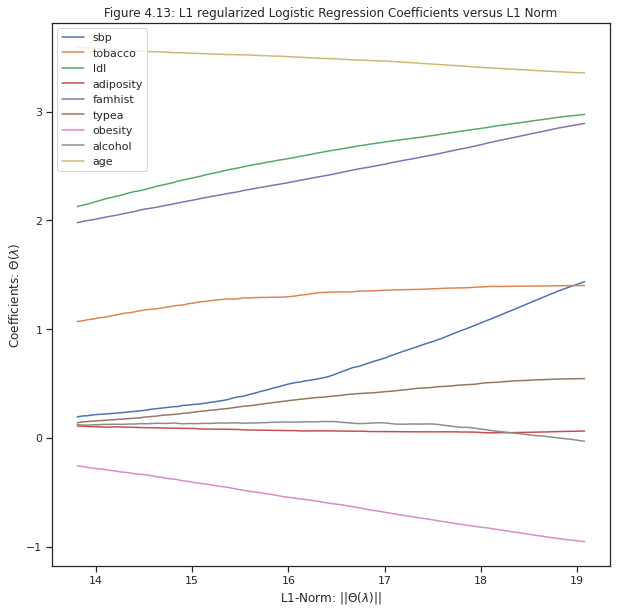

In [ ]:
# Plot Figure 4.13

lambda_vec = np.linspace(0.01,0.99,100)  #step-size

plt.figure(1)
plt.figure(figsize=(10,10))

theta_val = [0] * (10)
L1_vec = [0] * 1

for a in range(0,len(lambda_vec)):
  lamb = lambda_vec[a]
  theta_vec_L1,L1_norm = logistic(alpha, training_features, training_labels,lamb,1,0)
  L1_vec = np.append(L1_vec, L1_norm)
  theta_val = np.vstack([theta_val,theta_vec_L1])

theta_val = np.delete(theta_val, 0, axis=0)
theta_val = np.transpose(theta_val)
L1_vec = np.delete(L1_vec, 0, axis=0)

for b in range(1, len(theta_val)):
  plt.plot(L1_vec,theta_val[b])
  plt.xlabel('L1-Norm: ||${\Theta}({\lambda})$||')
  plt.ylabel('Coefficients: ${\Theta}({\lambda})$')
  legend_names = feature_names[1:len(feature_names)]
  plt.legend(legend_names)
plt.title('Figure 4.13: L1 regularized Logistic Regression Coefficients versus L1 Norm')

# South African Heart Disease datase
## Analysis of Results

Table 1 shows the features selected by the stepwise model for the South African Heart Disease dataset. Table 2 shows the 4 values of percent correct as well as the baseline percent correct for the South African Heart Disease dataset. All 4 models beat the baseline. The unregularized was better than baseline, the same as L1 and L2, and worse than stepwise. Baseline is 64.4%, unregularized, L1 and L2 are 75.5% and stepwise is 77.7%.

For the South African Heart Disease dataset, the most important features according to the L1 regularized model are age, ldl, famhist and tobacco. This is similar to the important features in figure 4.13 in the book.
For the South African Heart Disease dataset, the important features according to the stepwise model are sbp, tobacco, adiposity, famhist, obesity and alcohol. The features dropped from the model are age, typea and ldl. Some features such as famhist and tobacco are important in both models, however the L1 regularized and stepwise models choose different important features overall.


# Cleaning Up Banknotes Dataset

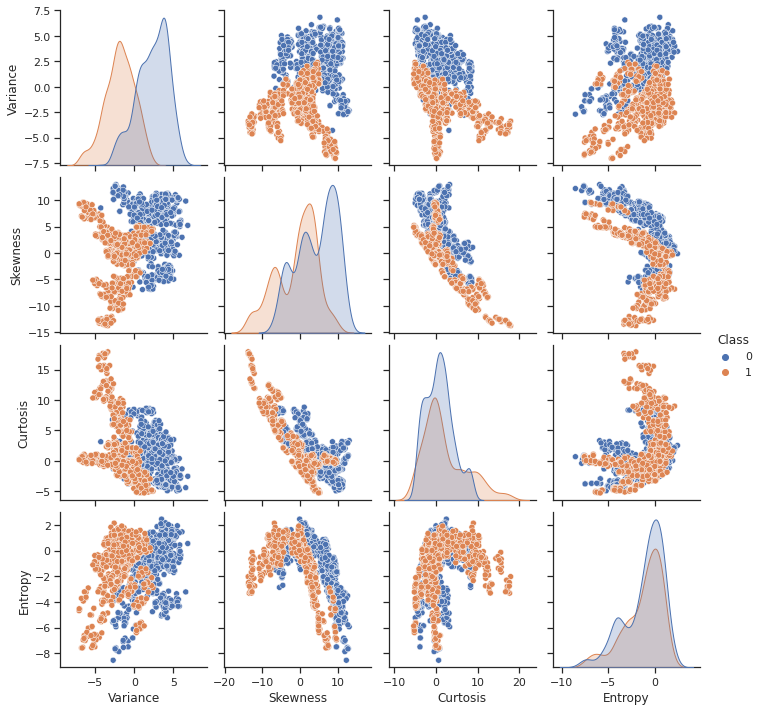

In [ ]:
# Load Bank Notes Data
url2 = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt'
b=requests.get(url2).content
BN_data=pd.read_csv(io.StringIO(b.decode('utf-8')))
BN_data.columns = ['Variance', 'Skewness', 'Curtosis', 'Entropy','Class']

# Visualize Data
sns.set(style="ticks", color_codes=True)
sns.pairplot(BN_data, hue='Class')

# Add Intercept Column
ones_col = np.ones(len(BN_data))
BN_data.insert(0,'Intercept',ones_col,True)

BN_data.describe()

### Shuffle, Separate into Features and Labels, Normalize

# Shuffle Data
BN_data = BN_data.sample(frac = 1) 

# Separate Data
features = BN_data.iloc[:,0:5]
labels = BN_data.iloc[:,5]

# Normalize features
col_means = features.mean()
col_vars = features.var()
feature_names = ['Intercept','Variance', 'Skewness', 'Curtosis', 'Entropy']

# Normalization loop (subtract mean and divide by standard deviation)
for i in range(1,len(feature_names)):
  features[feature_names[i]]  = (features[feature_names[i]] - col_means[i])/(col_vars[i]**(1/2))


# % Correct Banknotes Dataset

In [ ]:
# Calling All Functions!

training_features, training_labels, testing_features, testing_labels, validation_features, validation_labels = separate_data(features, labels)

### Evalutation function to find % Correct ###

# Compute baseline percent correct
baseline_p = baseline(training_labels,testing_labels)
#print('Baseline % Correct:', baseline_p)

# Compute unregularized percent correct
L1 = 0
L2 = 0
alpha = 0.003
theta_vec_unreg,L1_norm = logistic(alpha,training_features,training_labels,0,L1,L2)
unreg_p = percent_correct(testing_features,testing_labels,theta_vec_unreg)
#print('Unregularized % Correct:', unreg_p)

# Compute L2 regularize percent correct
L1 = 0
L2 = 1
optimal_lamda_L2 = validation(alpha,training_features,training_labels,validation_features,validation_labels,L1,L2)
theta_vec_L2,L1_norm = logistic(alpha, training_features, training_labels,optimal_lamda_L2,L1,L2)
L2_p = percent_correct(testing_features,testing_labels,theta_vec_L2)
#print('L2 Regularized % Correct:',L2_p)

# Stretch Gooaaalll #1
# Compute L1 regularize percent correct
L1 = 1
L2 = 0
optimal_lamda_L1 = validation(alpha,training_features,training_labels,validation_features,validation_labels,L1,L2)
theta_vec_L1,L1_norm = logistic(alpha, training_features, training_labels,optimal_lamda_L1,L1,L2)
L1_p = percent_correct(testing_features,testing_labels,theta_vec_L1)
#print('L1 Regularized % Correct:',L1_p)

print("Table 3: Features selected by stepwise model")
stepwise_p = stepwise(training_features,validation_features,testing_features,training_labels,validation_labels,testing_labels)
#print('Stepwise % Correct:',stepwise_p)

print("Table 4: Percent correct")
d = {'Method': ['Baseline','Unregularized','L2-Regularized','L1-Regularized','Stepwise'], 'Percent Correct': [baseline_p, unreg_p, L2_p, L1_p,stepwise_p]}
df = pd.DataFrame(data=d)
df



Table 3: Features selected by stepwise model


,Intercept,Variance,Skewness,Entropy
708,1.0,0.998345,0.255773,0.535464
402,1.0,0.934035,-0.767154,0.714508
1334,1.0,-0.703435,-1.561260,0.506546
13,1.0,1.045768,1.160233,0.294897
577,1.0,0.613472,-0.464616,0.243828
...,...,...,...,...
204,1.0,1.539595,0.053723,1.306381
1228,1.0,-0.067782,0.029048,0.250594
683,1.0,-0.882081,1.517437,-1.734229
563,1.0,0.558626,-0.186402,1.243003


Table 4: Percent correct


,Method,Percent Correct
0,Baseline,52.941176
1,Unregularized,85.294118
2,L2-Regularized,85.294118
3,L1-Regularized,86.029412
4,Stepwise,83.823529


Text(0.5, 1.0, 'Figure 4.13: L1 regularized Logistic Regression Coefficients versus L1 Norm')

<Figure size 432x288 with 0 Axes>

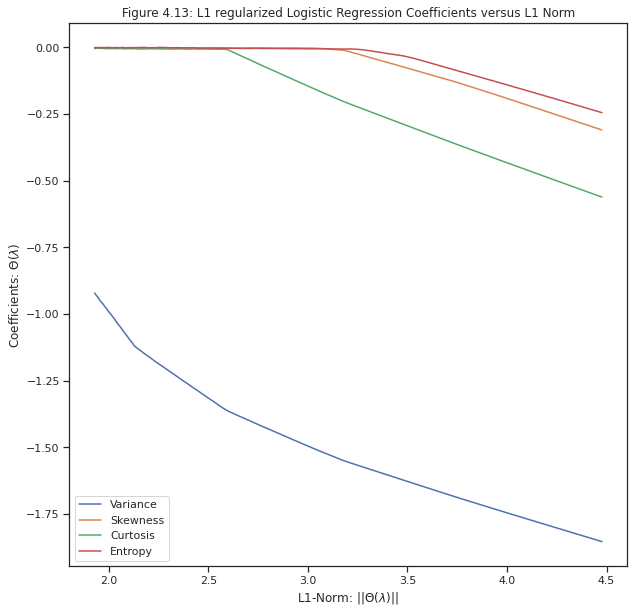

In [ ]:
# Plot L1 features

lambda_vec = np.linspace(0.01,0.99,100)  #step-size

plt.figure(1)
plt.figure(figsize=(10,10))

theta_val = [0] * (5)
L1_vec = [0] * 1

for a in range(0,len(lambda_vec)):
  lamb = lambda_vec[a]
  theta_vec_L1,L1_norm = logistic(alpha, training_features, training_labels,lamb,1,0)
  L1_vec = np.append(L1_vec, L1_norm)
  theta_val = np.vstack([theta_val,theta_vec_L1])

theta_val = np.delete(theta_val, 0, axis=0)
theta_val = np.transpose(theta_val)
L1_vec = np.delete(L1_vec, 0, axis=0)

for b in range(1, len(theta_val)):
  plt.plot(L1_vec,theta_val[b])
  plt.xlabel('L1-Norm: ||${\Theta}({\lambda})$||')
  plt.ylabel('Coefficients: ${\Theta}({\lambda})$')
  legend_names = feature_names[1:len(feature_names)]
  plt.legend(legend_names)
plt.title('Figure 4.13: L1 regularized Logistic Regression Coefficients versus L1 Norm')

# Banknote dataset
## Analysis of Results

Table 3 shows the features selected by the stepwise model for the Banknote dataset. Table 4 shows the 4 values of percent correct as well as the baseline percent correct for the Banknote dataset. All 4 models beat the baseline. The unregularized was better than baseline and stepwise, the same as L2, and worse than L1 regularized. Baseline is 52.9%, unregularized and L2 are 85.3%, L1 is 86.0%, and stepwise is 83.8%.

For the Banknote dataset, the most important features according to the L1 regularized model are variance and curtosis. For the Banknote dataset, the important features according to the stepwise model are variance, skewness and entropy. The only feature dropped from the stepwise model is curtosis. Both the L1 and stepwise model have variance as an important feature, but the other features differ.